# Problem Statement:
problem statement is to build model to predict a model which can identify a mail is spam or ham.

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
data_path=r"C:\Users\Abhinandan\Desktop\spam1.csv"

messages = pd.read_csv(data_path)

messages.shape

(6776, 5)

In [3]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
messages.isnull().sum()*100/messages.shape[0]

v1             0.000000
v2             0.000000
Unnamed: 2    99.173554
Unnamed: 3    99.763872
Unnamed: 4    99.881936
dtype: float64

Removing the last 3 columns because OF more numbers of NULLS

In [4]:
messages = messages.iloc[:,[0,1]]

In [5]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Renaming the columns for easy simplification of target variable and feature.

In [6]:
messages.rename(columns={"v1":"label", "v2":"message"}, inplace=True)

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

In [9]:
messages.label.replace({"ham":0,"spam":1},inplace=True)

In [10]:
messages.label.value_counts()

0    5854
1     922
Name: label, dtype: int64

In [11]:
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Lets convert whole data in lower case

In [12]:
messages.message= messages.message.str.lower()

In [13]:
messages.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


# Remove stop words and punctuations

nltk = nat. lang. tool kit

In [14]:
from nltk.corpus import stopwords

In [15]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [16]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
import string

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We are using a user defined function to remove punctuation and stop words

In [19]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Count vectorizer is ude to get the count of each and every word

In [21]:
bow_transformer =    CountVectorizer(analyzer = text_process   ).fit(messages["message"])

In [22]:
bow_transformer.vocabulary_

# Frequncy of every word

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [23]:
len(bow_transformer.vocabulary_)  # total number of unique words

9419

In [24]:
messages_bow = bow_transformer.transform(messages.message)   # creating the TDM

# this will act as my  X variables.

In [25]:
messages_bow.shape

(6776, 9419)

In [26]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(messages_bow, messages.label, test_size=.2)

In [29]:
messages.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


# Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
nb =MultinomialNB()

In [32]:
nb.fit(x_train, y_train)

MultinomialNB()

In [33]:
pred = nb.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix

tab_nb = confusion_matrix(pred , y_test)

tab_nb

array([[1157,    8],
       [  20,  171]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(pred , y_test)

acc*100

97.93510324483776

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier(criterion ="gini", max_depth= 3)

dtc.fit(x_train, y_train)
        
pred_dtc = dtc.predict(x_test)

In [37]:
tab_dtc= confusion_matrix(pred_dtc , y_test)

tab_dtc

array([[1119,   59],
       [  58,  120]], dtype=int64)

In [38]:
acc_dtc = accuracy_score(pred_dtc , y_test)

acc_dtc*100

91.3716814159292

# Logistic ReGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression
logireg = LogisticRegression()

In [40]:
logireg.fit(x_train, y_train)
    
pred_logireg = logireg.predict(x_test)

In [41]:
tab_logireg= confusion_matrix(pred_logireg , y_test)

tab_logireg

array([[1173,   25],
       [   4,  154]], dtype=int64)

In [42]:
acc_logireg = accuracy_score(pred_logireg , y_test)

acc_logireg*100

97.86135693215338

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=140,class_weight='balanced')

In [44]:
rfc.fit(x_train, y_train)
        
pred_rfc = rfc.predict(x_test)

In [45]:
tab_rfc= confusion_matrix(pred_rfc , y_test)

tab_rfc

array([[1177,   35],
       [   0,  144]], dtype=int64)

In [46]:
acc_rfc = accuracy_score(pred_rfc , y_test)

acc_rfc*100

97.4188790560472

As we can see above Logistic Regression gives best result on the given dataset. i.e. 98.08

# WordCloud

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
from nltk.corpus import stopwords

In [53]:
from wordcloud import WordCloud

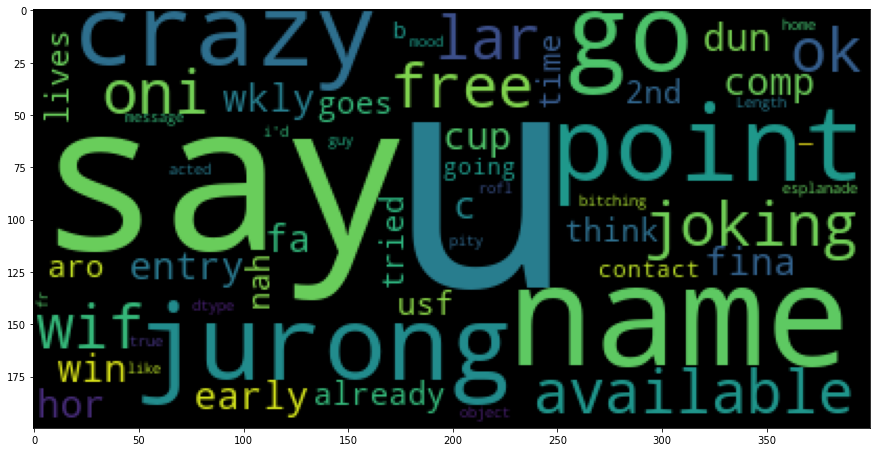

In [64]:
cloud = WordCloud(stopwords = stopwords.words('english'), max_words=5000).generate(str(messages.message))

plt.figure(figsize=(15,15))
plt.imshow(cloud)

In [65]:
messages.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


# Build a seprate word cloud on spam

In [70]:
ham_df  = messages[messages.label ==0]
spam_df = messages[messages.label ==1]

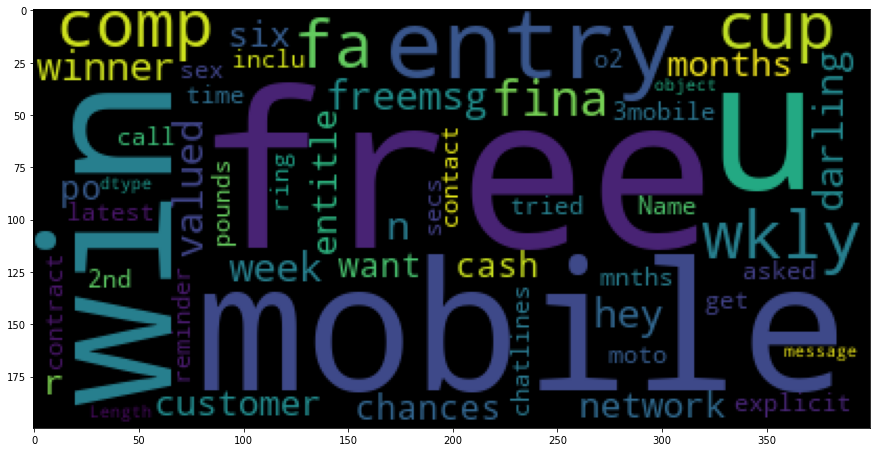

In [73]:
cloud = WordCloud(stopwords = stopwords.words('english'), max_words=5000).generate(str(spam_df.message))

plt.figure(figsize=(15,15))
plt.imshow(cloud)

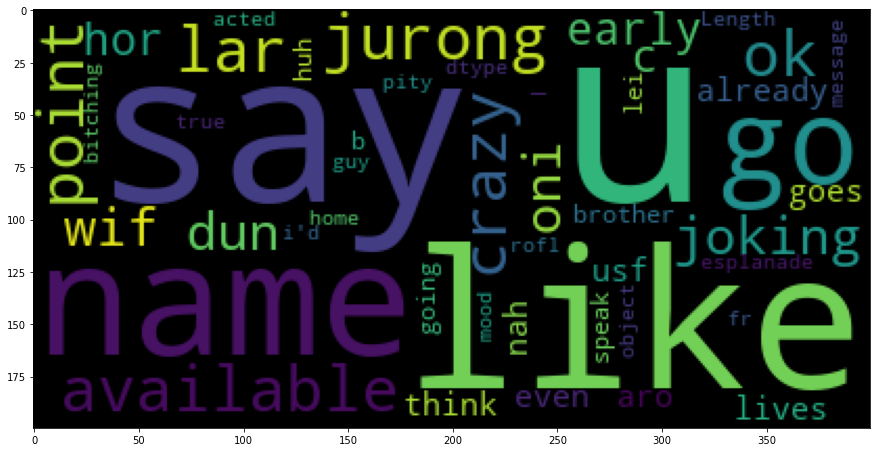

In [74]:
cloud = WordCloud(stopwords = stopwords.words('english'), max_words=5000).generate(str(ham_df.message))

plt.figure(figsize=(15,15))
plt.imshow(cloud)